In [1]:
!pip install requests
!pip install IPython


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datetime import datetime
import json

import requests
from IPython.display import Markdown, display

IST_SOS_ENDPOINT = "http://localhost:8018/istsos4/v1.1"

In [3]:
import json
import re
from datetime import datetime

import requests
from IPython.display import Markdown, display

IST_SOS_ENDPOINT = "http://localhost:8018/istsos4/v1.1"

In [4]:
username = input("Enter your username: ")
password = input("Enter your password: ")

if not username or not password:
    print("Username or password is empty")

else:
    data = {
        "username": username,
        "password": password,
        "grant_type": "password",
    }

    response = requests.post(IST_SOS_ENDPOINT + "/Login", data=data)
    if response.status_code == 200:
        token = response.json()["access_token"]
        print(
            f"Token expires at: { datetime.fromtimestamp(response.json()['expires_in'])}"
        )
        prefix = username + "-"
        print("Your station name will be prefixed with: " + prefix)
    else:
        result = json.dumps(response.json(), indent=2)
        display(Markdown(f"```json\n{result}\n```"))

Token expires at: 2026-02-23 10:10:34
Your station name will be prefixed with: lightning-sagar-


In [5]:
body = {
    "unitOfMeasurement": {"name": "", "symbol": "RSSI", "definition": ""},
    "description": "",
    "name": f"{prefix}RSSI_FIU_VALL",
    "observationType": "",
    "ObservedProperty": {
        "name": "ground:water:signal_strength",
        "definition": "{}",
        "description": "Ground water signal_strength",
    },
    "Sensor": {
        "name": f"{prefix}Ecolog 10000",
        "description": "",
        "properties": {},
        "encodingType": "application/json",
        "metadata": '{"brand": "OTT", "type": "Pressure, temperature, electrical conductivity sensor"}',
    },
    "Thing": {
        "name": f"{prefix}FIU_VALL",
        "description": "Water level, water temperature and water electrical conductivity recorder Ticino river",
        "properties": {
            "keywords": "water,river,height,temperature,conductivity,ACSOT",
            "description": "River level, water temperature and water electrical conductivity fiume Ticino valle",
        },
        "Locations": [
            {
                "name": f"{prefix}fiume Ticino",
                "description": "",
                "encodingType": "application/vnd.geo+json",
                "location": {
                    "type": "Point",
                    "coordinates": [8.956099, 46.172245],
                },
            }
        ],
    },
}

response = requests.post(
    IST_SOS_ENDPOINT + "/Datastreams",
    data=json.dumps(body),
    headers={
        "Content-type": "application/json",
        "Authorization": f"Bearer {token}",
        "Commit-message": "Create Datastrem and related Observations",
    },
)

if response.status_code == 201:
    print(f"Datastream created successfully ({response.headers['location']})")
    match = re.search(r"\((\d+)\)", response.headers["location"])
    if match:
        datastream_id = int(match.group(1))
    else:
        print("No number found in parentheses.")
else:
    result = json.dumps(response.json(), indent=2)
    display(Markdown(f"```json\n{result}\n```"))

Datastream created successfully (http://localhost:8018/istsos4/v1.1/Datastreams(1))


In [6]:
!pip install python-dateutil
!pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 5.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 5.4 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.5 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.6 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---

In [7]:
import time

import matplotlib.pyplot as plt
import requests
from dateutil import parser
from IPython.display import clear_output

IST_SOS_ENDPOINT = "http://localhost:8018/istsos4/v1.1"

Matplotlib is building the font cache; this may take a moment.


In [8]:
# Set variables from user input
istsos_username = input("Enter your istsos username: ")
if istsos_username.strip() == "":
    print("You must enter a username")
    exit()
istsos_password = input("Enter your istsos password: ")
if istsos_password.strip() == "":
    print("You must enter a password")
    exit()
datastream_id = input("Enter the datastream ID: ")
if datastream_id.strip() == "":
    print("You must enter a datastream ID")
    exit()
else:
    try:
        datastream_id = int(datastream_id)
    except ValueError:
        print("Datastream ID must be an integer")
        exit()
frequency = input(
    "Enter the frequency of the stream in seconds (default: 5): "
)
if frequency.strip() == "":
    frequency = 5
else:
    try:
        frequency = int(frequency)
    except ValueError:
        print("Frequency must be an integer")
        exit()

# Login to istsos and get token
req = requests.post(
    f"{IST_SOS_ENDPOINT}/Login",
    headers={"Content-Type": "application/x-www-form-urlencoded"},
    data={"username": istsos_username, "password": istsos_password},
)

if req.status_code != 200:
    print("Login failed")
    raise Exception(req.text)
token_obj = req.json()

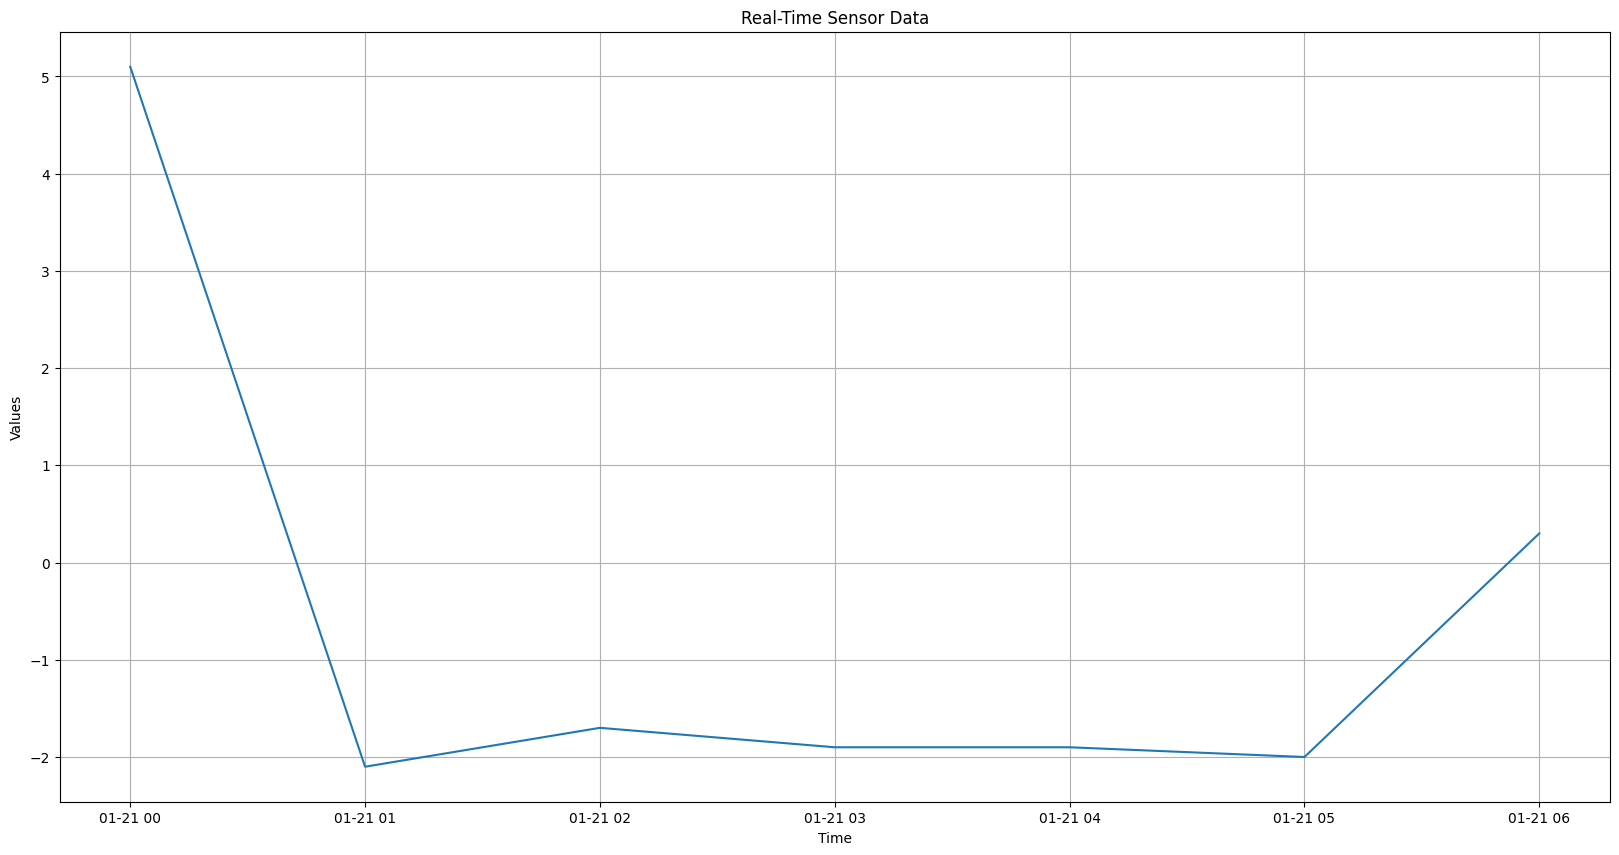

KeyboardInterrupt: 

In [9]:
# Initial data fetch
req = requests.get(
    f"{IST_SOS_ENDPOINT}/Datastreams({datastream_id})/Observations?$orderby=phenomenonTime desc",
    headers={
        "Content-Type": "application/json",
        "Authorization": f"Bearer {token_obj['access_token']}",
    },
)

if req.status_code != 200:
    print("Failed to get datastream")
    raise Exception(req.text)
else:
    data = req.json()["value"]
    dt = [parser.parse(i["phenomenonTime"]) for i in data]
    values = [i["result"] for i in data]

# Reverse the order for chronological plotting
dt.reverse()
values.reverse()


while True:

    # Fetch the latest observation
    req = requests.get(
        f"{IST_SOS_ENDPOINT}/Datastreams({datastream_id})/Observations?$orderby=phenomenonTime desc",
        headers={
            "Content-Type": "application/json",
            "Authorization": f"Bearer {token_obj['access_token']}",
        },
    )
    if req.status_code == 200:

        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_title("Real-Time Sensor Data")
        ax.set_xlabel("Time")
        ax.set_ylabel("Values")
        ax.grid(True)
        new_data = req.json()["value"]
        for obs in new_data:
            obs_time = parser.parse(obs["phenomenonTime"])
            if obs_time not in dt:
                dt.append(obs_time)
                values.append(obs["result"])
        ax.plot(dt, values, label="Sensor Data")
        plt.pause(0.1)

    else:
        print("Failed to fetch the latest observation")
        print(req.text)

    time.sleep(frequency)

In [ ]:
import json
import subprocess
import sys
from getpass import getpass
from pathlib import Path

endpoint = "http://localhost:8018/istsos4/v1.1"
stac_root_href = "http://localhost:8020/stac"
output_file = Path("metadata.json")
stac_file = Path("stac_items.json")
dcat_file = Path("dcat_catalog.json")

istsos_username = input("Enter your istsos username: ").strip()
istsos_password = getpass("Enter your istsos password: ")

if not istsos_username or not istsos_password:
    raise ValueError("Username and password are required")

cmd = [
    sys.executable,
    "collect_sensorthings_metadata.py",
    "--endpoint",
    endpoint,
    "--username",
    istsos_username,
    "--password",
    istsos_password,
    "--incremental",
    "--output",
    str(output_file),
    "--stac-output",
    str(stac_file),
    "--dcat-output",
    str(dcat_file),
    "--stac-collection-id",
    "istsos-datastreams",
    "--stac-root-href",
    stac_root_href,
]

result = subprocess.run(cmd, capture_output=True, text=True)
print(result.stdout)
if result.returncode != 0:
    print(result.stderr)
    raise RuntimeError("Metadata collection failed")

records = json.loads(output_file.read_text(encoding="utf-8"))
stac_data = json.loads(stac_file.read_text(encoding="utf-8"))
dcat_data = json.loads(dcat_file.read_text(encoding="utf-8"))

print(f"Total metadata records: {len(records)}")
print(f"STAC features: {len(stac_data.get('features', []))}")
print(f"DCAT datasets: {len(dcat_data.get('dcat:dataset', []))}")
records[:5]

Wrote 1 records to metadata.json; STAC to stac_items.json; DCAT to dcat_catalog.json

Total metadata records: 1
STAC features: 1
DCAT datasets: 1


[{'thing_id': 2,
  'thing_name': 'lightning-sagar-FIU_VALL',
  'datastream_name': 'lightning-sagar-RSSI_FIU_VALL',
  'description': 'Water level, water temperature and water electrical conductivity recorder Ticino river',
  'location': {'lat': 46.172245, 'lon': 8.956099},
  'sensor_type': 'lightning-sagar-Ecolog 10000',
  'observed_property': 'ground:water:signal_strength',
  'unit_of_measurement': 'RSSI',
  'observation_type': '',
  'sampling_frequency': '',
  'time_range': '2024-01-21T00:00:00Z/2024-01-21T06:00:00Z',
  'start_time': '2024-01-21T00:00:00Z',
  'end_time': '2024-01-21T06:00:00Z',
  'last_observation_time': '2024-01-21T06:00:00Z',
  'datastream_id': 1}]